# IMPORT LIBARIES

In [ ]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
import plotly.express as px
from termcolor import cprint
colorpalt = ["#d62828", "#f77f00", "#fcbf49", "#003049"]
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

# READ DATASET

In [ ]:
data = pd.read_csv('marketing_campaign.csv', sep="\t")

In [ ]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# Checking Missing Value and Duplicated Data

## Missing Value

In [ ]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

There are 24 missing values in column Income

In [ ]:
data.isna().sum() * 100 / len(data)

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

In [ ]:
data[10:30]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
11,387,1976,Basic,Married,7500.0,0,0,13-11-2012,59,6,...,8,0,0,0,0,0,0,3,11,0
12,2125,1959,Graduation,Divorced,63033.0,0,0,15-11-2013,82,194,...,2,0,0,0,0,0,0,3,11,0
13,8180,1952,Master,Divorced,59354.0,1,1,15-11-2013,53,233,...,6,0,0,0,0,0,0,3,11,0
14,2569,1987,Graduation,Married,17323.0,0,0,10-10-2012,38,3,...,8,0,0,0,0,0,0,3,11,0
15,2114,1946,PhD,Single,82800.0,0,0,24-11-2012,23,1006,...,3,0,0,1,1,0,0,3,11,1
16,9736,1980,Graduation,Married,41850.0,1,1,24-12-2012,51,53,...,8,0,0,0,0,0,0,3,11,0
17,4939,1946,Graduation,Together,37760.0,0,0,31-08-2012,20,84,...,7,0,0,0,0,0,0,3,11,0
18,6565,1949,Master,Married,76995.0,0,1,28-03-2013,91,1012,...,5,0,0,0,1,0,0,3,11,0
19,2278,1985,2n Cycle,Single,33812.0,1,0,03-11-2012,86,4,...,6,0,0,0,0,0,0,3,11,0


In [ ]:
data['Income']=data['Income'].fillna(data['Income'].median())

In [ ]:
data[10:30]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,51381.5,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
11,387,1976,Basic,Married,7500.0,0,0,13-11-2012,59,6,...,8,0,0,0,0,0,0,3,11,0
12,2125,1959,Graduation,Divorced,63033.0,0,0,15-11-2013,82,194,...,2,0,0,0,0,0,0,3,11,0
13,8180,1952,Master,Divorced,59354.0,1,1,15-11-2013,53,233,...,6,0,0,0,0,0,0,3,11,0
14,2569,1987,Graduation,Married,17323.0,0,0,10-10-2012,38,3,...,8,0,0,0,0,0,0,3,11,0
15,2114,1946,PhD,Single,82800.0,0,0,24-11-2012,23,1006,...,3,0,0,1,1,0,0,3,11,1
16,9736,1980,Graduation,Married,41850.0,1,1,24-12-2012,51,53,...,8,0,0,0,0,0,0,3,11,0
17,4939,1946,Graduation,Together,37760.0,0,0,31-08-2012,20,84,...,7,0,0,0,0,0,0,3,11,0
18,6565,1949,Master,Married,76995.0,0,1,28-03-2013,91,1012,...,5,0,0,0,1,0,0,3,11,0
19,2278,1985,2n Cycle,Single,33812.0,1,0,03-11-2012,86,4,...,6,0,0,0,0,0,0,3,11,0


In [ ]:
data.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

There is no Missing Value

## Duplicated Data

In [ ]:
data.duplicated().sum()

0

There is no Duplicated Data

# Data Cleaning

## Convert Dt_Customer data type to date

In [ ]:
data['Dt_Customer']

0       04-09-2012
1       08-03-2014
2       21-08-2013
3       10-02-2014
4       19-01-2014
           ...    
2235    13-06-2013
2236    10-06-2014
2237    25-01-2014
2238    24-01-2014
2239    15-10-2012
Name: Dt_Customer, Length: 2240, dtype: object

In [ ]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
dates = []
for i in data['Dt_Customer']:
    i = i.date()
    dates.append(i)

# dates of the newest and oldest customer
print('The newest customer date:',max(dates))
print('The noldest customer date:',min(dates))

The newest customer date: 2014-12-06
The noldest customer date: 2012-01-08


## Create Dt_Collab column

This column shows how long has it been since user registrasion.

In [ ]:
data['Dt_Collab'] = 2022 - data['Dt_Customer'].dt.year 

In [ ]:
data['Dt_Collab'].value_counts()

9     1189
8      557
10     494
Name: Dt_Collab, dtype: int64

## Create Age Column

In [ ]:
data['Age'] = 2022 - data['Year_Birth']

In [ ]:
data['Age']

0       65
1       68
2       57
3       38
4       41
        ..
2235    55
2236    76
2237    41
2238    66
2239    68
Name: Age, Length: 2240, dtype: int64

## Create Total Spending Column

In [ ]:
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

In [ ]:
data["Spent"]

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Spent, Length: 2240, dtype: int64

## Simplifying Martial Status

In [ ]:
data['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [ ]:
data["MaritalStatus"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", 
                                                      "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", 
                                                      "Divorced":"Alone", "Single":"Alone",})

## Simplifying Education

In [ ]:
data['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [ ]:
data['Education'] = data['Education'].replace({'Basic':'Undergraduate', '2n Cycle':'Undergraduate',
                                               'Graduation':'Graduate', 'Master':'Graduate',
                                               'PhD':'Graduate'})

In [ ]:
data['Education'].value_counts()

Graduate         1983
Undergraduate     257
Name: Education, dtype: int64

## Total Children Column

In [ ]:
data["Children"]=data["Kidhome"]+data["Teenhome"]

In [ ]:
data["Children"]

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Children, Length: 2240, dtype: int64

## Create total member in household

In [ ]:
data["Family_Size"] = data["MaritalStatus"].replace({"Alone": 1, "Partner":2})+ data["Children"]

In [ ]:
data["Family_Size"]

0       1
1       3
2       2
3       3
4       3
       ..
2235    3
2236    5
2237    1
2238    3
2239    4
Name: Family_Size, Length: 2240, dtype: int64

## Rename Column

In [ ]:
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat",
                          "MntFishProducts":"Fish", "MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

## Drop some feature that not use

In [ ]:
drop = ['Marital_Status', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'ID', 
        'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
data = data.drop(drop, axis=1)

In [ ]:
data

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Dt_Collab,Age,Spent,MaritalStatus,Children,Family_Size
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,8,10,4,7,10,65,1617,Alone,0,1
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,1,1,2,5,8,68,27,Alone,2,3
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,8,2,10,4,9,57,776,Partner,0,2
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,2,0,4,6,8,38,53,Partner,1,3
4,Graduate,58293.0,1,0,94,173,43,118,46,27,...,5,3,6,5,8,41,422,Partner,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,61223.0,0,1,46,709,43,182,42,118,...,9,3,4,5,9,55,1341,Partner,1,3
2236,Graduate,64014.0,2,1,56,406,0,30,0,0,...,8,2,5,7,8,76,444,Partner,3,5
2237,Graduate,56981.0,0,0,91,908,48,217,32,12,...,2,3,13,6,8,41,1241,Alone,0,1
2238,Graduate,69245.0,0,1,8,428,30,214,80,30,...,6,5,10,3,8,66,843,Partner,1,3


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   object 
 1   Income               2240 non-null   float64
 2   Kidhome              2240 non-null   int64  
 3   Teenhome             2240 non-null   int64  
 4   Recency              2240 non-null   int64  
 5   Wines                2240 non-null   int64  
 6   Fruits               2240 non-null   int64  
 7   Meat                 2240 non-null   int64  
 8   Fish                 2240 non-null   int64  
 9   Sweets               2240 non-null   int64  
 10  Gold                 2240 non-null   int64  
 11  NumDealsPurchases    2240 non-null   int64  
 12  NumWebPurchases      2240 non-null   int64  
 13  NumCatalogPurchases  2240 non-null   int64  
 14  NumStorePurchases    2240 non-null   int64  
 15  NumWebVisitsMonth    2240 non-null   i

# EDA

In [ ]:
categoricals = ['Education', 'MaritalStatus']

numericals = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines', 'Fruits', 'Meat',
              'Fish', 'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
              'NumWebVisitsMonth', 'Dt_Collab', 'Age', 'Spent', 'Children', 'Family_Size']

In [ ]:
data[numericals].describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Dt_Collab,Age,Spent,Children,Family_Size
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,8.971875,53.194196,605.798214,0.950446,2.595089
std,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.684554,11.984069,602.249288,0.751803,0.906959
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,26.000000,5.000000,0.000000,1.000000
25%,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,9.000000,45.000000,68.750000,0.000000,2.000000
50%,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,9.000000,52.000000,396.000000,1.000000,3.000000
75%,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,9.000000,63.000000,1045.500000,1.000000,3.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,10.000000,129.000000,2525.000000,3.000000,5.000000


In [ ]:
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]

In [ ]:
data[categoricals].describe()

,Education,MaritalStatus
count,2236,2236
unique,2,2
top,Graduate,Partner
freq,1981,1442


# UNIVARIATE ANALYSIS

## Boxplot

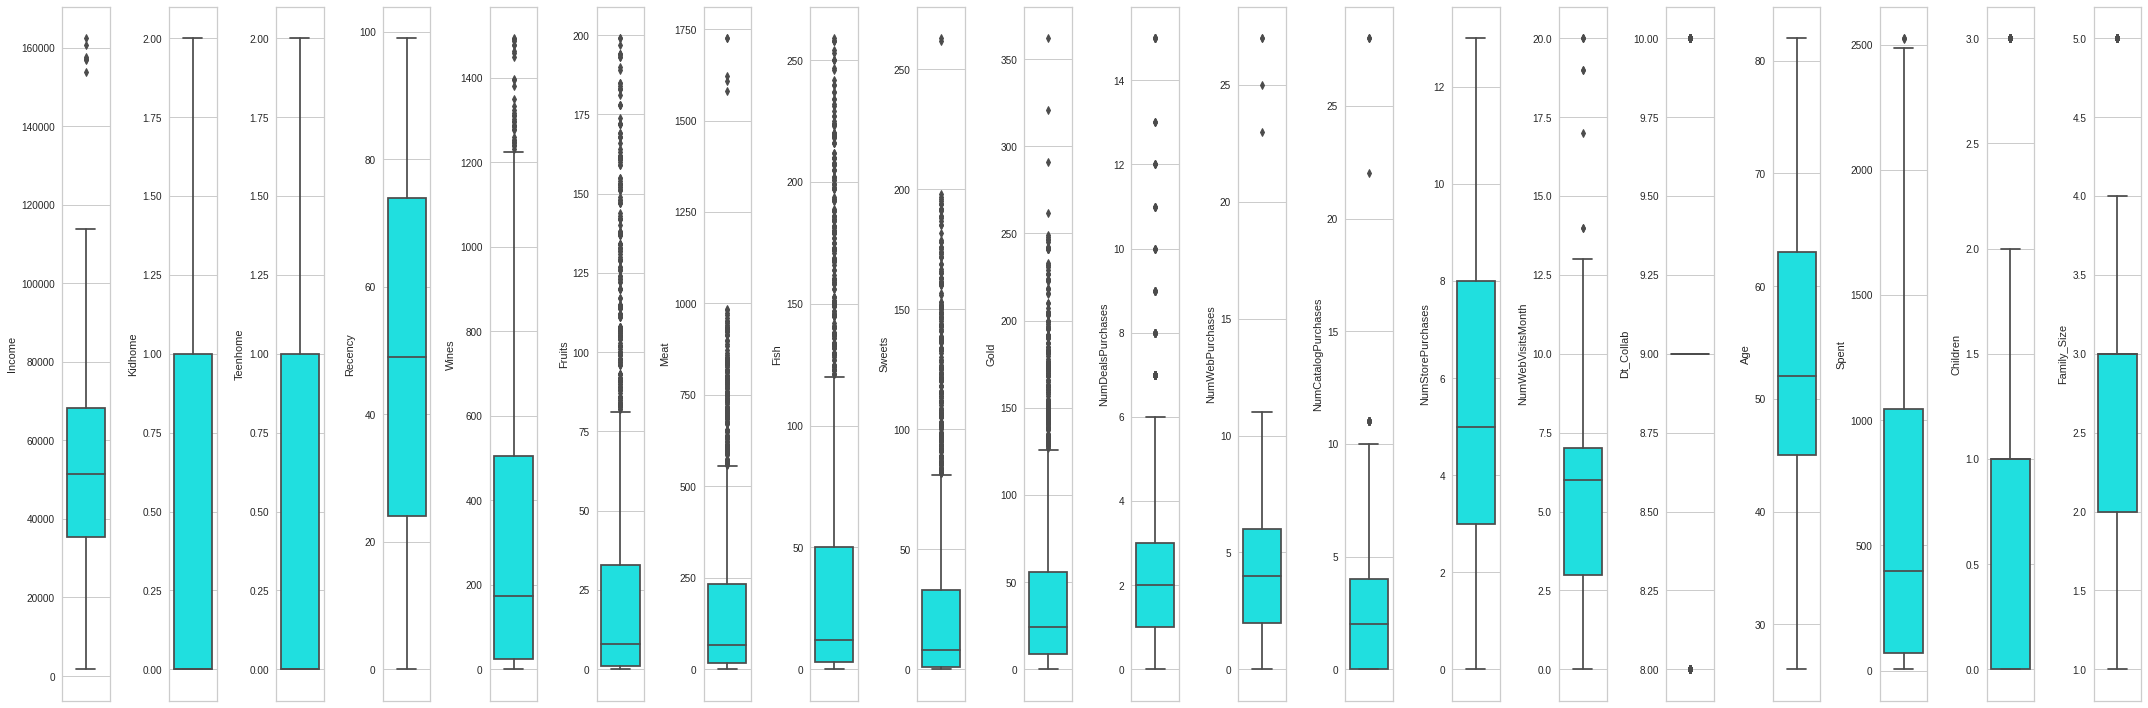

In [ ]:
plt.figure(figsize=(30,10))

features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=data[features[i]], color='cyan')
    plt.tight_layout()

There are many outlier for some features

* `Wines`
* `Fruits`
* `Meats`
* `Fish`
* `Sweets`
* `Gold`
* `NumDealsPurchases`


i will give treatment for some feature that have outliers with logtransformation

## Treatment Outliers

In [ ]:
data["Wines"] = data["Wines"].map(lambda i: np.log(i) if i > 0 else 0) 
print(data['Wines'].skew())
print(data['Wines'].skew())

-0.6374639934073091
-0.6374639934073091


In [ ]:
data["Fruits"] = data["Fruits"].map(lambda i: np.log(i) if i > 0 else 0) 
print(data['Fruits'].skew())
print(data['Fruits'].skew())

0.13628316068933372
0.13628316068933372


In [ ]:
data["Meat"] = data["Meat"].map(lambda i: np.log(i) if i > 0 else 0) 
print(data['Meat'].skew())
print(data['Meat'].skew())

-0.1771312410060142
-0.1771312410060142


In [ ]:
data["Fish"] = data["Fish"].map(lambda i: np.log(i) if i > 0 else 0) 
print(data['Fish'].skew())
print(data['Fish'].skew())

0.020221441515398328
0.020221441515398328


In [ ]:
data['Sweets'] = data['Sweets'].map(lambda i: np.log(i) if i > 0 else 0) 
print(data['Sweets'].skew())
print(data['Sweets'].skew())

0.13710011874519754
0.13710011874519754


In [ ]:
data["Gold"] = data["Gold"].map(lambda i: np.log(i) if i > 0 else 0) 
print(data['Gold'].skew())
print(data['Gold'].skew())

-0.43408114039666096
-0.43408114039666096


In [ ]:
data["NumDealsPurchases"] = data["NumDealsPurchases"].map(lambda i: np.log(i) if i > 0 else 0) 
print(data['NumDealsPurchases'].skew())
print(data['NumDealsPurchases'].skew())

0.659388626968259
0.659388626968259


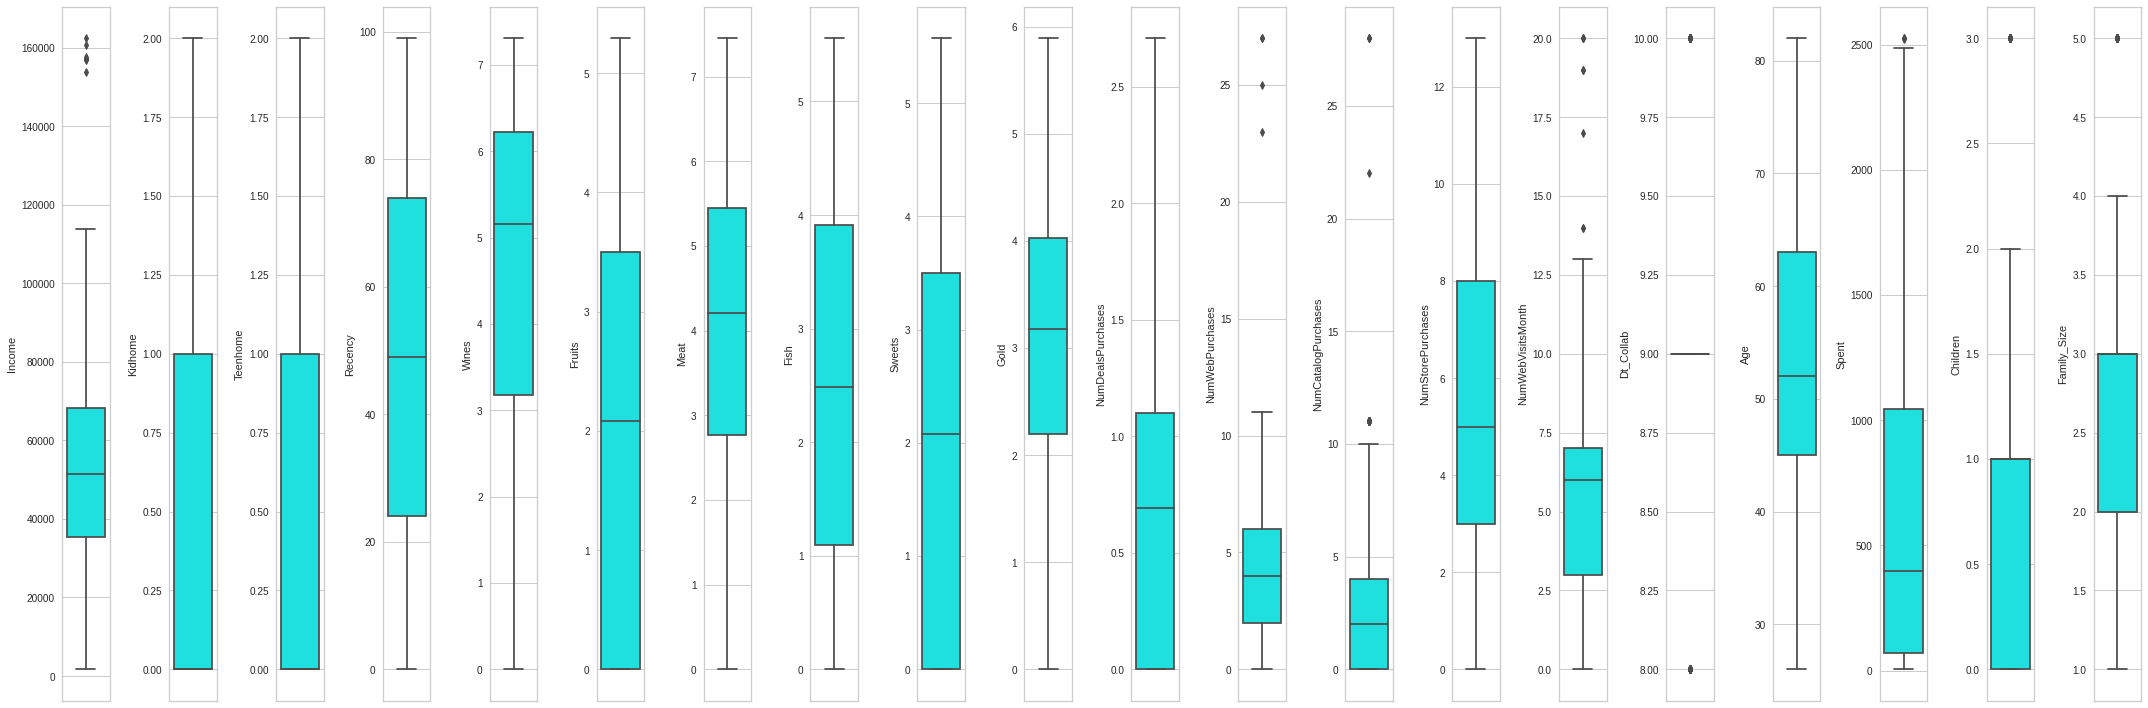

In [ ]:
plt.figure(figsize=(30,10))

features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=data[features[i]], color='cyan')
    plt.tight_layout()

## VIF

In [ ]:
# as always, first thing is to split the data
from sklearn.model_selection import train_test_split

X = data.drop(columns='MaritalStatus')
y = data[['MaritalStatus']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(X_train[numericals])

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,vif_score
1,Income,4.492426
2,Kidhome,inf
3,Teenhome,inf
4,Recency,1.012607
5,Wines,6.424635
6,Fruits,2.694157
7,Meat,7.586649
8,Fish,2.815325
9,Sweets,2.626397
10,Gold,1.986033


There are some feature that have vif score > 4




*   `Income`
*   `Kidhome`
*   `Teenhome`
*   `Wines`
*   `Meat`
*   `Spent`
*   `Childrem`









# Bivariate Analysis

## Heatmap Correlation

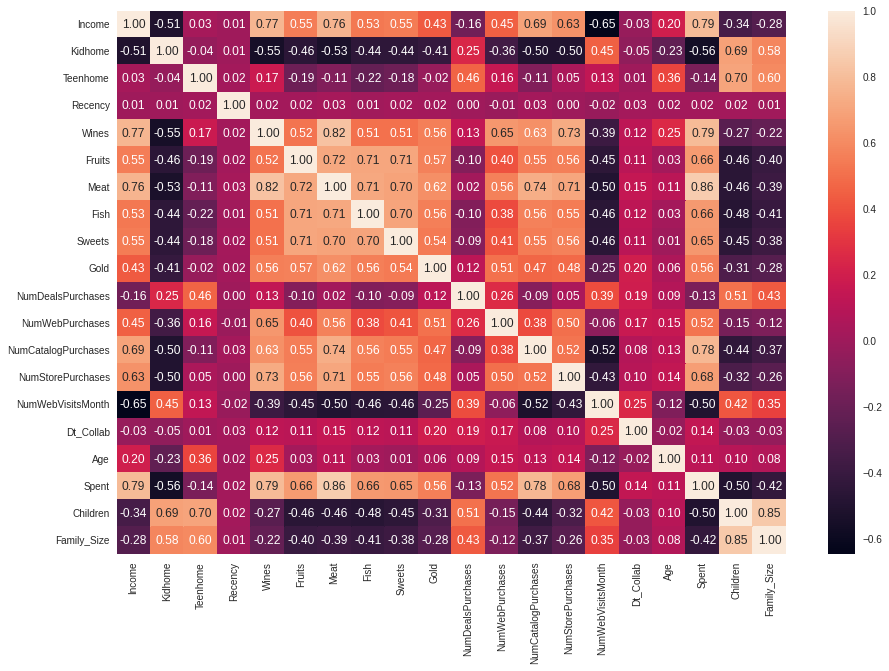

In [ ]:
plt.figure(figsize=(15,10))

correlation = data.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

In [ ]:
sns.pairplot(data, hue='MaritalStatus')

Output hidden; open in https://colab.research.google.com to view.

According VIF value and Correlation Heatmap, I will drop some feature below here

In [ ]:
data.drop(['Kidhome', 'Teenhome', 
         'Wines', 'Meat', 'Children'] ,axis=1 , inplace = True)

# Data Preprocessing

## One Hot Encoding

In [ ]:
data.head()

,Education,Income,Recency,Fruits,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Dt_Collab,Age,Spent,MaritalStatus,Family_Size
0,Graduate,58138.0,58,4.477337,5.147494,4.477337,4.477337,1.098612,8,10,4,7,10,65,1617,Alone,1
1,Graduate,46344.0,38,0.000000,0.693147,0.000000,1.791759,0.693147,1,1,2,5,8,68,27,Alone,3
2,Graduate,71613.0,26,3.891820,4.709530,3.044522,3.737670,0.000000,8,2,10,4,9,57,776,Partner,2
3,Graduate,26646.0,26,1.386294,2.302585,1.098612,1.609438,0.693147,2,0,4,6,8,38,53,Partner,3
4,Graduate,58293.0,94,3.761200,3.828641,3.295837,2.708050,1.609438,5,3,6,5,8,41,422,Partner,3


In [ ]:
data['MaritalStatus'] = data['MaritalStatus'].replace("Partner", 0).replace("Alone", 1) 
data.head()

,Education,Income,Recency,Fruits,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Dt_Collab,Age,Spent,MaritalStatus,Family_Size
0,Graduate,58138.0,58,4.477337,5.147494,4.477337,4.477337,1.098612,8,10,4,7,10,65,1617,1,1
1,Graduate,46344.0,38,0.000000,0.693147,0.000000,1.791759,0.693147,1,1,2,5,8,68,27,1,3
2,Graduate,71613.0,26,3.891820,4.709530,3.044522,3.737670,0.000000,8,2,10,4,9,57,776,0,2
3,Graduate,26646.0,26,1.386294,2.302585,1.098612,1.609438,0.693147,2,0,4,6,8,38,53,0,3
4,Graduate,58293.0,94,3.761200,3.828641,3.295837,2.708050,1.609438,5,3,6,5,8,41,422,0,3


In [ ]:
data['Education'] = data['Education'].replace("Undergraduate", 0).replace("Graduate", 1) 
data.head()

,Education,Income,Recency,Fruits,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Dt_Collab,Age,Spent,MaritalStatus,Family_Size
0,1,58138.0,58,4.477337,5.147494,4.477337,4.477337,1.098612,8,10,4,7,10,65,1617,1,1
1,1,46344.0,38,0.000000,0.693147,0.000000,1.791759,0.693147,1,1,2,5,8,68,27,1,3
2,1,71613.0,26,3.891820,4.709530,3.044522,3.737670,0.000000,8,2,10,4,9,57,776,0,2
3,1,26646.0,26,1.386294,2.302585,1.098612,1.609438,0.693147,2,0,4,6,8,38,53,0,3
4,1,58293.0,94,3.761200,3.828641,3.295837,2.708050,1.609438,5,3,6,5,8,41,422,0,3


## VIF

In [ ]:
# as always, first thing is to split the data
from sklearn.model_selection import train_test_split

X = data.drop(columns='MaritalStatus')
y = data[['MaritalStatus']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(X_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif_score
1,Education,1.131579
2,Income,3.779554
3,Recency,1.008464
4,Fruits,2.603842
5,Fish,2.672771
6,Sweets,2.570041
7,Gold,1.924332
8,NumDealsPurchases,1.725043
9,NumWebPurchases,1.905629
10,NumCatalogPurchases,2.822526


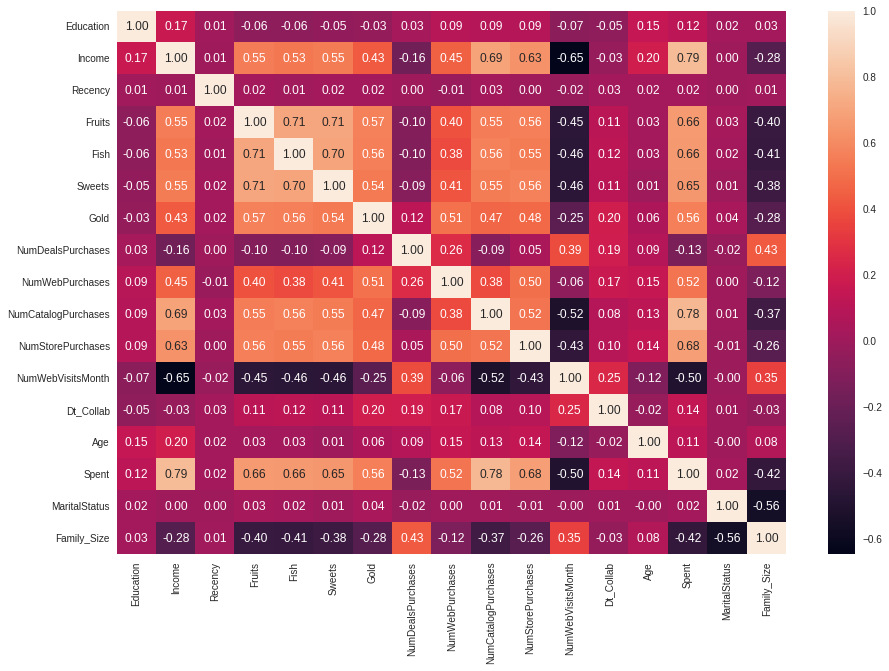

In [ ]:
plt.figure(figsize=(15,10))

correlation = data.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

# Scalling

In [ ]:
scaler = StandardScaler()
scaler.fit(data)
scaled_ds = pd.DataFrame(scaler.transform(data),columns= data.columns )

In [ ]:
scaled_ds.head()

,Education,Income,Recency,Fruits,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Dt_Collab,Age,Spent,MaritalStatus,Family_Size
0,0.35878,0.288947,0.306856,1.436551,1.585833,1.414978,1.044397,0.740156,1.407639,2.509801,-0.552429,0.692865,1.500981,1.016868,1.680176,1.347635,-1.758810
1,0.35878,-0.262003,-0.383971,-1.276803,-1.027176,-1.263478,-0.894129,0.118758,-1.110921,-0.568970,-1.167738,-0.131421,-1.419988,1.273264,-0.962202,1.347635,0.445618
2,0.35878,0.918423,-0.798467,1.081716,1.328914,0.557832,0.510484,-0.943530,1.407639,-0.226884,1.293496,-0.543564,0.040496,0.333146,0.282541,-0.742041,-0.656596
3,0.35878,-1.182183,-0.798467,-0.436681,-0.083048,-0.606260,-1.025734,0.118758,-0.751127,-0.911056,-0.552429,0.280722,-1.419988,-1.290693,-0.918994,-0.742041,0.445618
4,0.35878,0.296187,1.550344,1.002558,0.812167,0.708175,-0.232724,1.523025,0.328256,0.115201,0.062879,-0.131421,-1.419988,-1.034298,-0.305762,-0.742041,0.445618


# Dimensional Reduction

In [ ]:
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2236.0,1.271096e-17,2.482637,-5.376278,-2.319815,0.364728,2.251000,6.158975
col2,2236.0,1.271096e-17,1.380220,-4.299390,-1.031199,-0.091369,0.972205,4.680420
col3,2236.0,-5.719933e-17,1.223826,-4.259901,-0.849984,-0.091811,0.778348,4.767402


In [ ]:
PCA_ds.head()

,col1,col2,col3
0,-3.714683,0.954278,1.909241
1,2.654312,-1.207498,-1.114730
2,-2.483914,0.057561,-0.386313
3,2.330178,-0.658311,-0.412280
4,-0.612918,0.697728,-0.549744


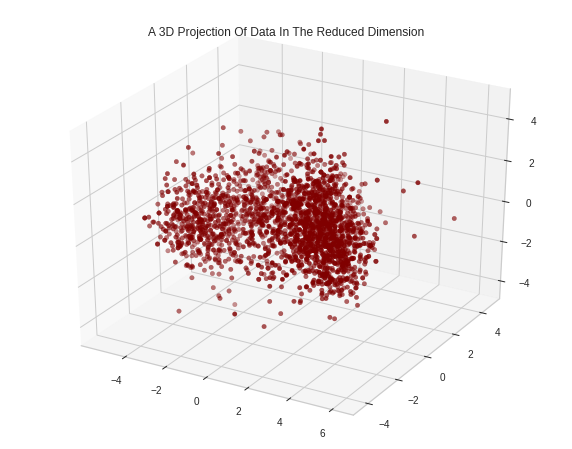

In [ ]:
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

# Clustering

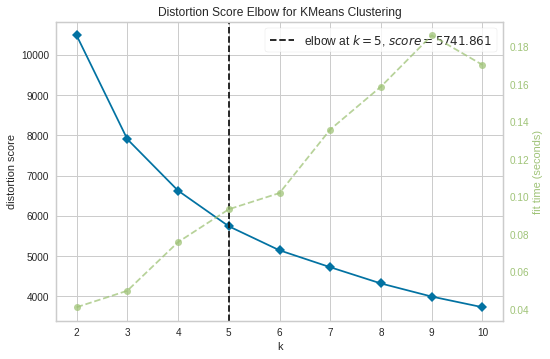

In [ ]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

## K-Means Model

In [ ]:
KM = KMeans(n_clusters=5)
km_pred = KM.fit_predict(PCA_ds)

In [ ]:
data["Cluster"]= km_pred

# add predicted clusters for each data point into reduced dimension data   
PCA_ds["Cluster"] = km_pred

In [ ]:
fig = px.scatter_3d(PCA_ds, x='col1', y='col2', z='col3',
title="Clusters Visualization",color="Cluster")
fig.update_traces(marker=dict(size=4),selector=dict(mode='markers'))
fig.update_layout(autosize=False,
    width=700,
    height=680,)
fig.show()

## Profiling

### Total Member for Cluster

Total members of each cluster :
4    529
1    525
3    402
0    400
2    380
Name: Cluster, dtype: int64
**************************************************


Text(0.5, 1.0, 'Total members of each cluster')

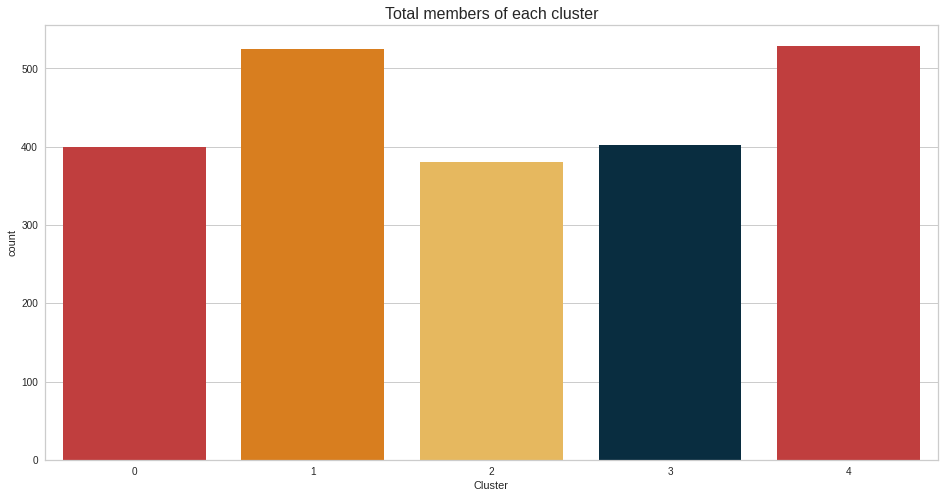

In [ ]:
cprint('Total members of each cluster :','green')
print(data['Cluster'].value_counts())
cprint('*'*50,'green')
plt.rcParams['figure.figsize'] = (16, 8)
countcluster=sns.countplot(x='Cluster', data=data,palette=colorpalt)
countcluster.set_title('Total members of each cluster',fontsize=16)

### Spent of the member compared by income

             Income   Spent
Cluster                    
0        19379256.0  179620
1        40126794.5  699706
2        11092153.5   41063
3        25326640.0  398009
4        20241201.0   36588
**************************************************


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Text(0.5, 1.0, 'Income vs Spent of each cluster')

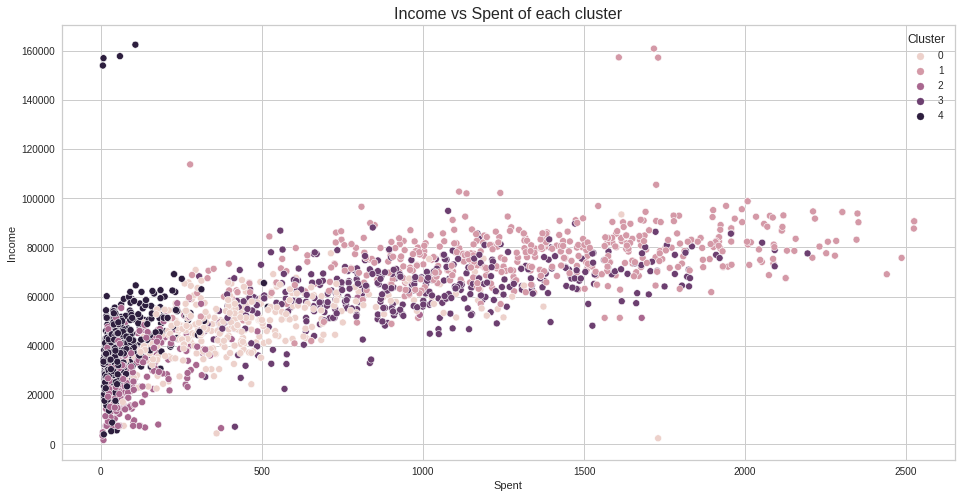

In [ ]:
print(data.groupby(['Cluster'])['Income','Spent'].agg('sum'))
cprint('*'*50,'green')
spentscatter = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["Cluster"])
spentscatter.set_title('Income vs Spent of each cluster',fontsize=16)

Text(0.5, 1.0, 'Money Spent In Each Cluster')

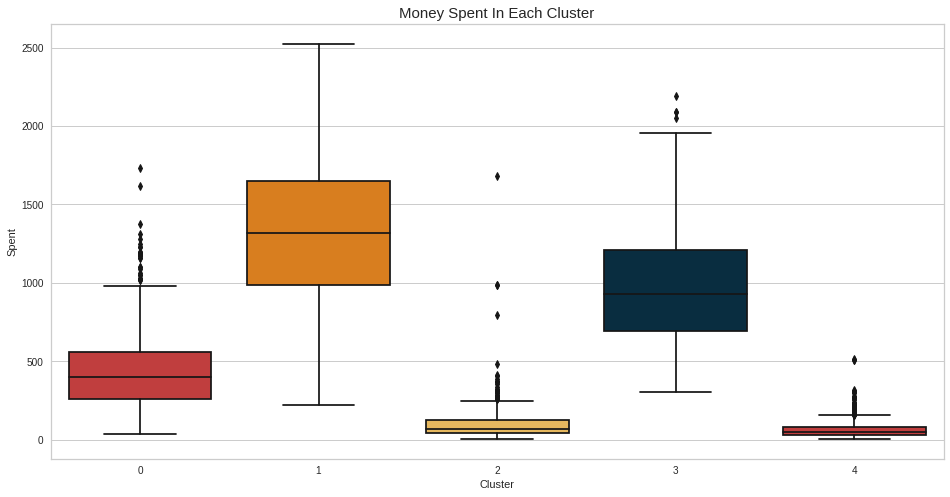

In [ ]:
spentbox =sns.boxplot(x=data["Cluster"], y=data["Spent"], palette=colorpalt)
spentbox.set_title("Money Spent In Each Cluster", size=15)

### Family Size in each cluster

Cluster  Family_Size
0        1                1
         2               53
         3              222
         4              109
         5               15
1        1              186
         2              308
         3               31
2        1               45
         2              216
         3              116
         4                3
3        1               18
         2              133
         3              222
         4               28
         5                1
4        1                4
         2               51
         3              297
         4              161
         5               16
dtype: int64


Text(0.5, 1.0, 'FamilySize In Each Cluster')

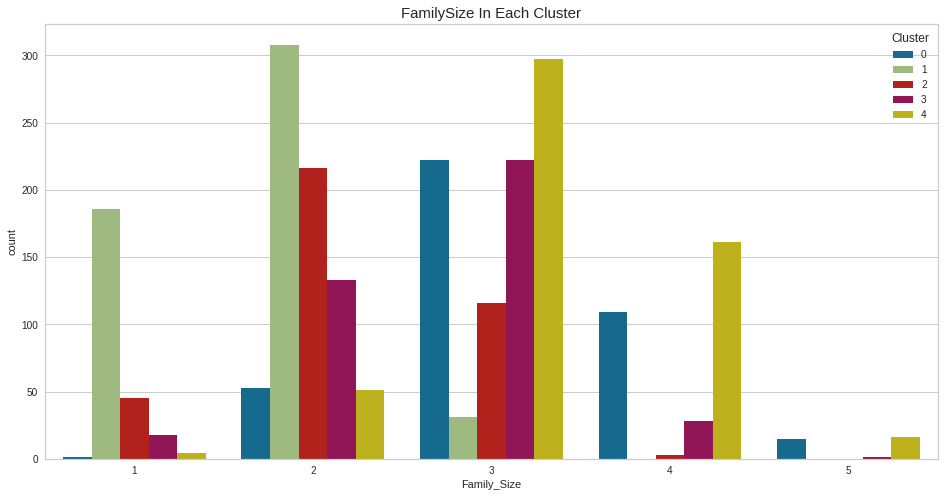

In [ ]:
print(data.groupby(['Cluster','Family_Size']).size())

familySizecount = sns.countplot(x=data['Family_Size'],hue=data['Cluster'])
familySizecount.set_title("FamilySize In Each Cluster", size=15)

### Number of purchases in each cluster

In [ ]:
data['TotalPurchases'] = data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases']

Cluster
0    5207
1    9990
2    2226
3    7898
4    2733
Name: TotalPurchases, dtype: int64


Text(0.5, 1.0, 'Total Purchases In Each Clusters')

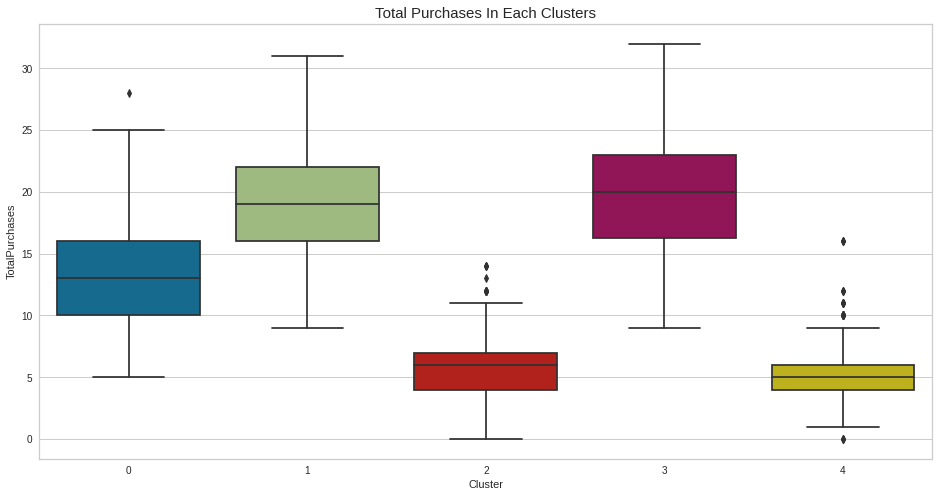

In [ ]:
print(data.groupby(['Cluster'])['TotalPurchases'].agg('sum'))
purchasesbox=sns.boxplot(x=data["Cluster"], y=data["TotalPurchases"])
purchasesbox.set_title("Total Purchases In Each Clusters", size=15)

### What are each cluster interested in buying ?

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



              Fruits         Fish       Sweets         Gold
Cluster                                                    
0         607.289827   751.737284   581.827525  1339.309136
1        1967.940869  2201.459027  1955.680578  2029.913530
2         551.899997   681.927179   550.767919   965.452446
3        1307.191892  1402.062850  1338.356054  1586.869359
4         276.633122   427.943636   295.897087   854.563869
**************************************************


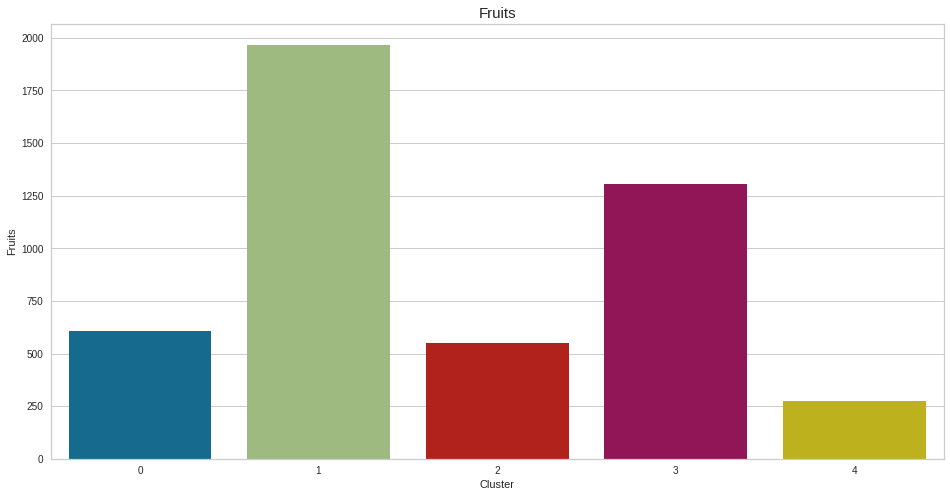

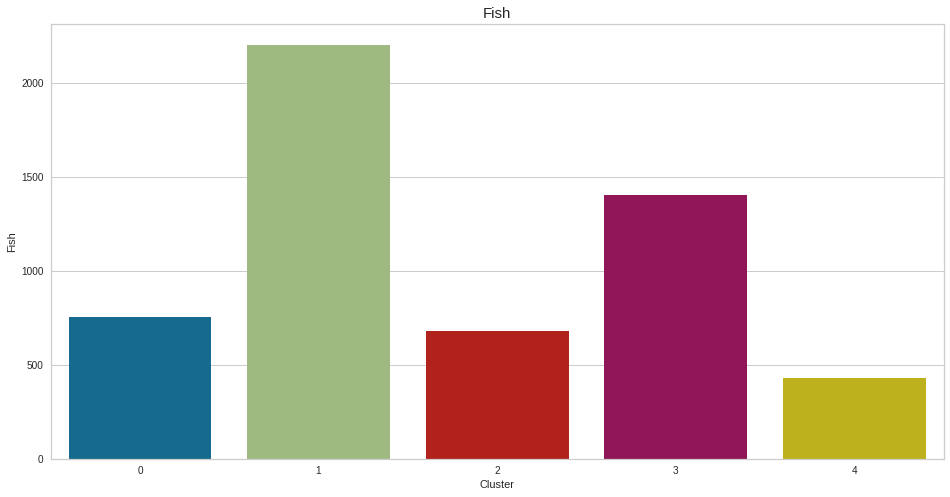

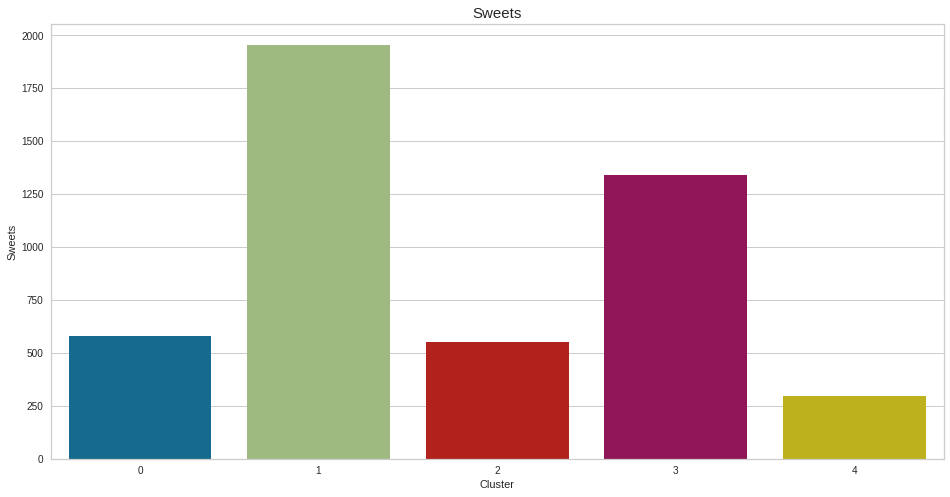

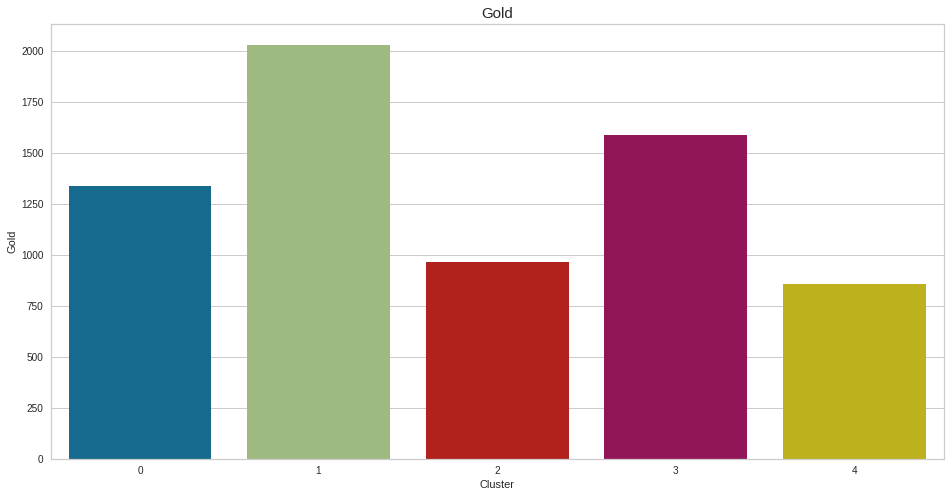

In [ ]:
data_buying=data.groupby(['Cluster'])['Fruits','Fish','Sweets','Gold'].agg('sum')
print(data_buying)
cprint('*'*50,'green')
Products = ['Fruits','Fish','Sweets','Gold']
for i in Products:
    plt.figure()
    sns.barplot(y=data_buying[i],x=data_buying.index).set_title(f'{i}',size=15)
    plt.show()

###  Marital status in each cluster

Cluster  MaritalStatus
0        0                317
         1                 83
1        0                296
         1                229
2        0                132
         1                248
3        0                274
         1                128
4        0                423
         1                106
dtype: int64
**************************************************


Text(0.5, 1.0, 'Marital Status In Each Cluster')

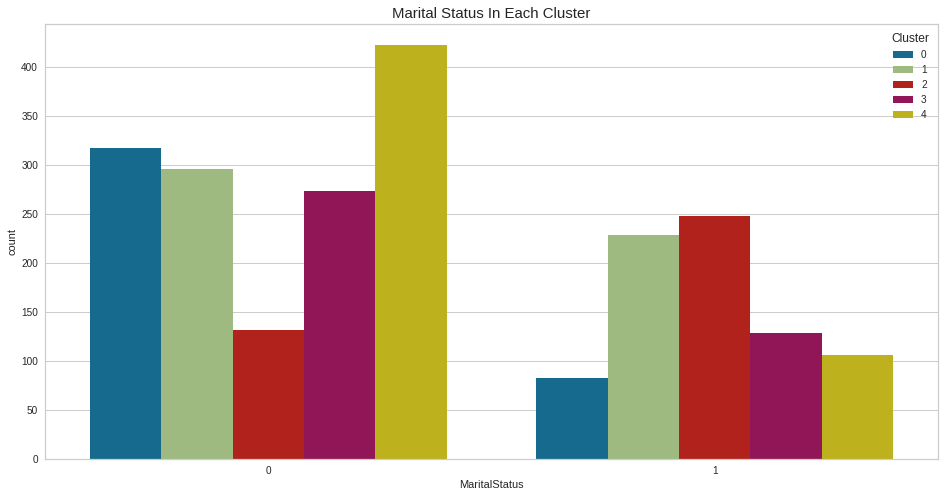

In [ ]:
print(data.groupby(['Cluster', 'MaritalStatus']).size())
cprint('*'*50,'green')
maritalcount = sns.countplot(x=data['MaritalStatus'],hue=data["Cluster"])
maritalcount.set_title("Marital Status In Each Cluster", size=15)

### Education Tittle in each cluster

Cluster  Education
0        0             15
         1            385
1        0             44
         1            481
2        0            137
         1            243
3        0             39
         1            363
4        0             20
         1            509
dtype: int64
**************************************************


Text(0.5, 1.0, 'Education Status In Each Cluster')

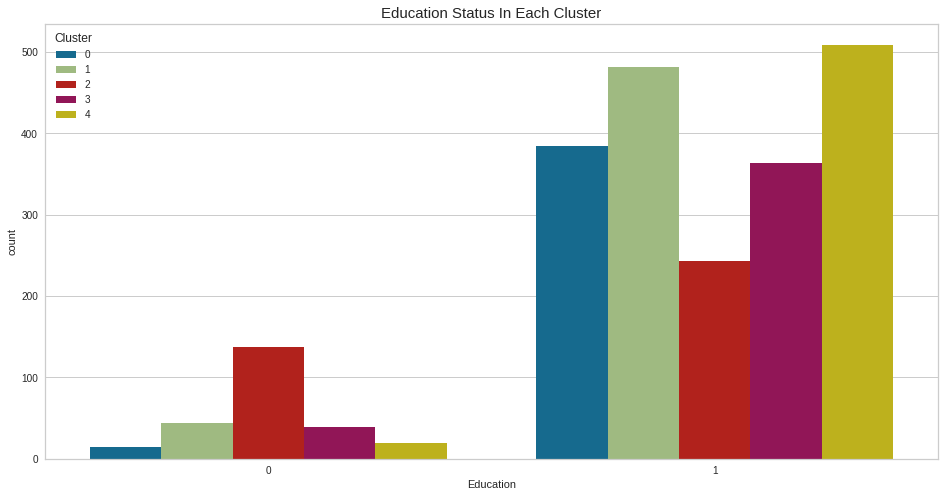

In [ ]:
print(data.groupby(['Cluster', 'Education']).size())
cprint('*'*50,'green')
Educount = sns.countplot(x=data['Education'],hue=data["Cluster"])
Educount.set_title("Education Status In Each Cluster", size=15)

### Age in each cluster

Avg Age of each cluster : 
Cluster
0    56.265000
1    54.011429
2    45.342105
3    55.549751
4    53.521739
Name: Age, dtype: float64
None
**************************************************
Maximum Age of each cluster : 
Cluster
0    76
1    81
2    78
3    79
4    82
Name: Age, dtype: int64
None
**************************************************
Minimum Age of each cluster : 
Cluster
0    33
1    27
2    26
3    30
4    32
Name: Age, dtype: int64
None
**************************************************


Text(0.5, 1.0, 'Age In Each Cluster')

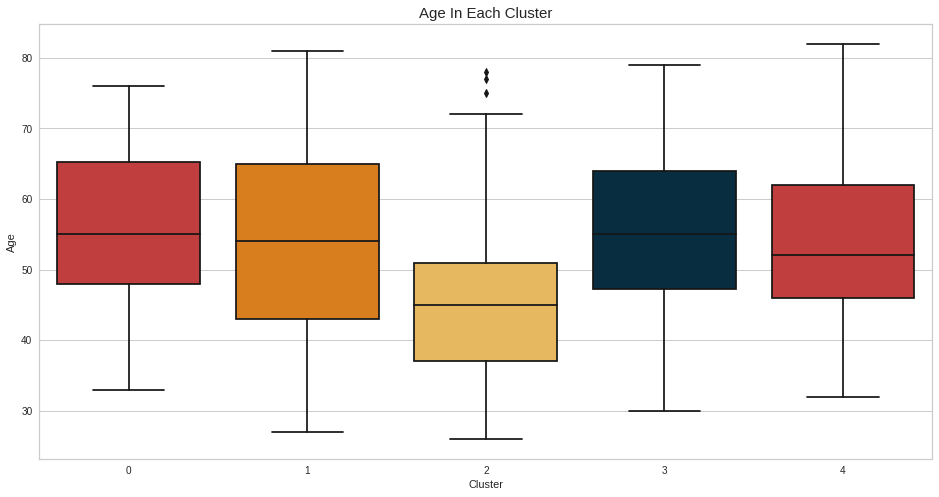

In [ ]:
cprint('Avg Age of each cluster : ','green')
print(print(data.groupby(['Cluster'])['Age'].agg('mean')))
cprint('*'*50)
cprint('Maximum Age of each cluster : ','green')
print(print(data.groupby(['Cluster'])['Age'].agg('max')))
cprint('*'*50)
cprint('Minimum Age of each cluster : ','green')
print(print(data.groupby(['Cluster'])['Age'].agg('min')))
cprint('*'*50)
agebox=sns.boxplot(x=data["Cluster"], y=data["Age"], palette=colorpalt)
agebox.set_title("Age In Each Cluster", size=15)

# Summary

**cluster 0**

1. Total member of this cluster is 400
2. Compared to other clusters, they have avg Income and low spending
3. Compared to other clusters, they have been 5207 product
4. Their Family Size is between 1 and 5 people.
5. They are mostly married.
6. Their Age is between 33 and 76 years (most of them are around 56 years old).
7. They mostly has been graduated
8. They mostly interested buying gold

cluster 1
**bold text**
1. Total member of this cluster is 525
2. Compared to other clusters, they have avg high Income and high spending
3. Compared to other clusters, they have been 9990 product
4. Their Family Size is between 1 and 3 people.
5. They are mostly married.
6. Their Age is between 27 and 81 years (most of them are around 54 years old).
7. They mostly has been graduated
8. They mostly interested buying fish

**cluster 2**

1. Total member of this cluster is 380.
2. Compared to other clusters, they have avg Income and avg spending.
3. Compared to other clusters, they have been 2226 product.
4. Their Family Size is between 1 and 4 people.
5. They are mostly single parents.
6. Their Age is between 26 and 78 years (most of them are around 55 years old).
7. They mostly has been graduated.
8. They mostly interested buying gold.

**cluster 3**

1. Total member of this cluster is 402
2. Compared to other clusters, they have high Income and high spending
3. Compared to other clusters, they have been 7898 product
4. Their Family Size is between 1 and 5 people.
5. They are mostly married.
6. Their Age is between 30 and 79 years (most of them are around 56 years old).
7. They mostly has been graduated
8. They mostly interested buying gold.

**cluster 4**

1. Total member of this cluster is 529
2. Compared to other clusters, they have low Income and low spending
3. Compared to other clusters, they have been 2733 product
4. Their Family Size is between 1 and 5 people.
5. They are mostly married.
6. Their Age is between 32 and 82 years (most of them are around 53 years old).
7. They mostly has been graduated
8. They mostly interested buying gold.


